In [1]:
# importing all requirements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline

In [2]:
# loading file
df = pd.read_csv("/content/cubic_zirconia.csv")

**Checking basic info**

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# dropping unnecessary unnamed index column
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [6]:
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 


**Observation 1: x, y and z columns have 3, 3 and 9 zeros respectively. Since 2D diamonds are not possible, these are faulty records which need to be removed.**

In [7]:
# dropping faulty records
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [8]:
df.shape

(26958, 10)

In [9]:
df.describe(include=['object'])

,cut,color,clarity
count,26958,26958,26958
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5658,6570


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26261 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


**Checking missing values**

In [11]:
df.isna().sum().sum()

697

In [12]:
df['depth'].isna().sum()

697

**Observation 2:
Depth column has 697 missing values. Rest of the dataset does not have missing values. Missing values can be dealt with as and when necessary. So, there is no need to remove missing values now because removing missing values could lead to significant loss of data.**

**Checking duplicates**

In [13]:
df.duplicated().sum()

33

**Observation 3: 33 duplicate records found which need to be dropped.**

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(26925, 10)

**Checking for outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


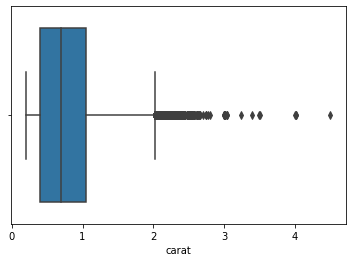

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


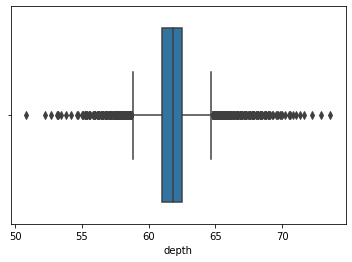

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


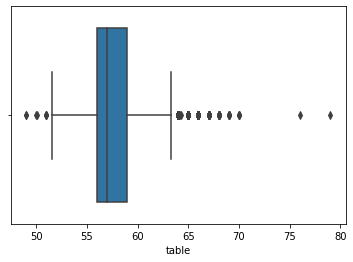

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


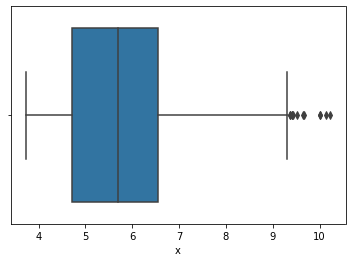

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


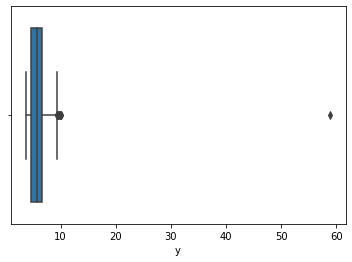

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


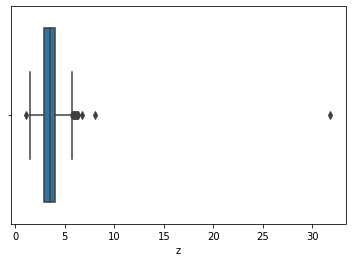

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


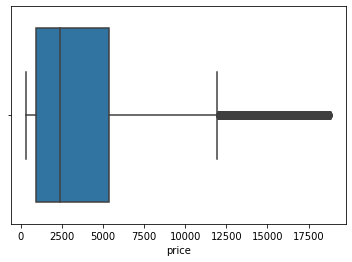

In [16]:
# box plot
columns = ['carat','depth', 'table', 'x', 'y', 'z', 'price' ]
for col in columns:
  sns.boxplot(df[col],whis=1.5)
  plt.show()
# Note that missing values of depth column are ignored by boxplot. So, missing values are not an issue here.

**Observation 4: Several outliers are found for various columns. Few extreme outliers need to be removed for all outlier columns except for price since price is a dependent variable.**

In [17]:
# outlier treatment based on boxplots above
df.drop(df[(df['carat'] >= 3)].index , inplace=True)
df.drop(df[(df['depth'] > 70) | (df['depth'] < 55)].index , inplace=True)
df.drop(df[(df['table'] > 64) | (df['table'] < 51)].index , inplace=True)
df.drop(df[(df['x'] > 10)].index , inplace=True)
df.drop(df[(df['y'] > 50)].index , inplace=True)
df.drop(df[(df['z'] > 30)].index , inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


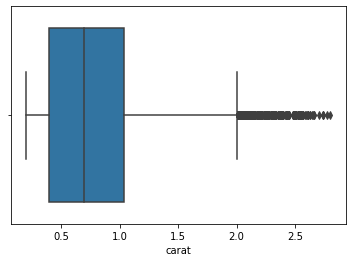

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


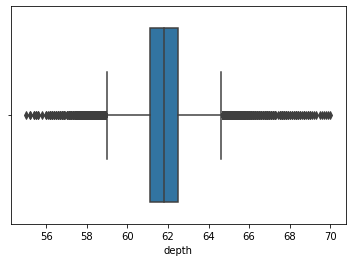

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


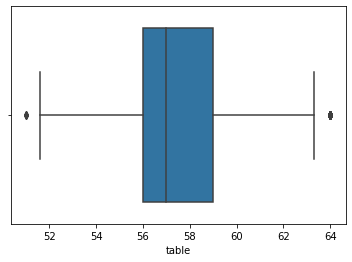

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


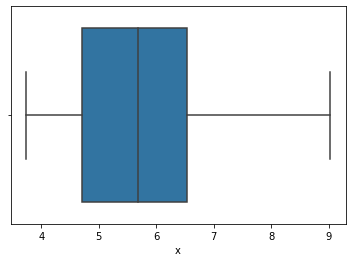

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


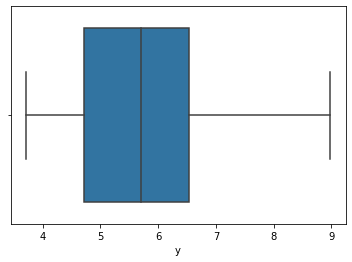

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


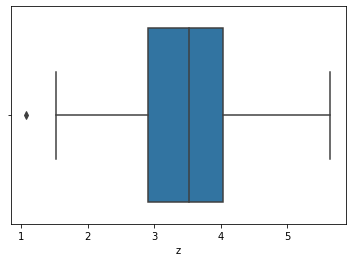

In [18]:
columns.remove('price')
for col in columns:
  sns.boxplot(df[col],whis=1.5)
  plt.show()

In [19]:
df.shape

(26702, 10)

**Almost all outliers have been removed in x, y, z and table columns. This was achieved without losing much of data and without changing actual data. As for depth and carat, the outliers are not extreme outliers. Instead, they represent important data, distribution and information regarding carat and depth. Thus, these box plot outliers should not be removed. Also, attempting to remove or change them would lead to significant loss of data.**

# **Univariate analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8159859990>,
      dtype=object)

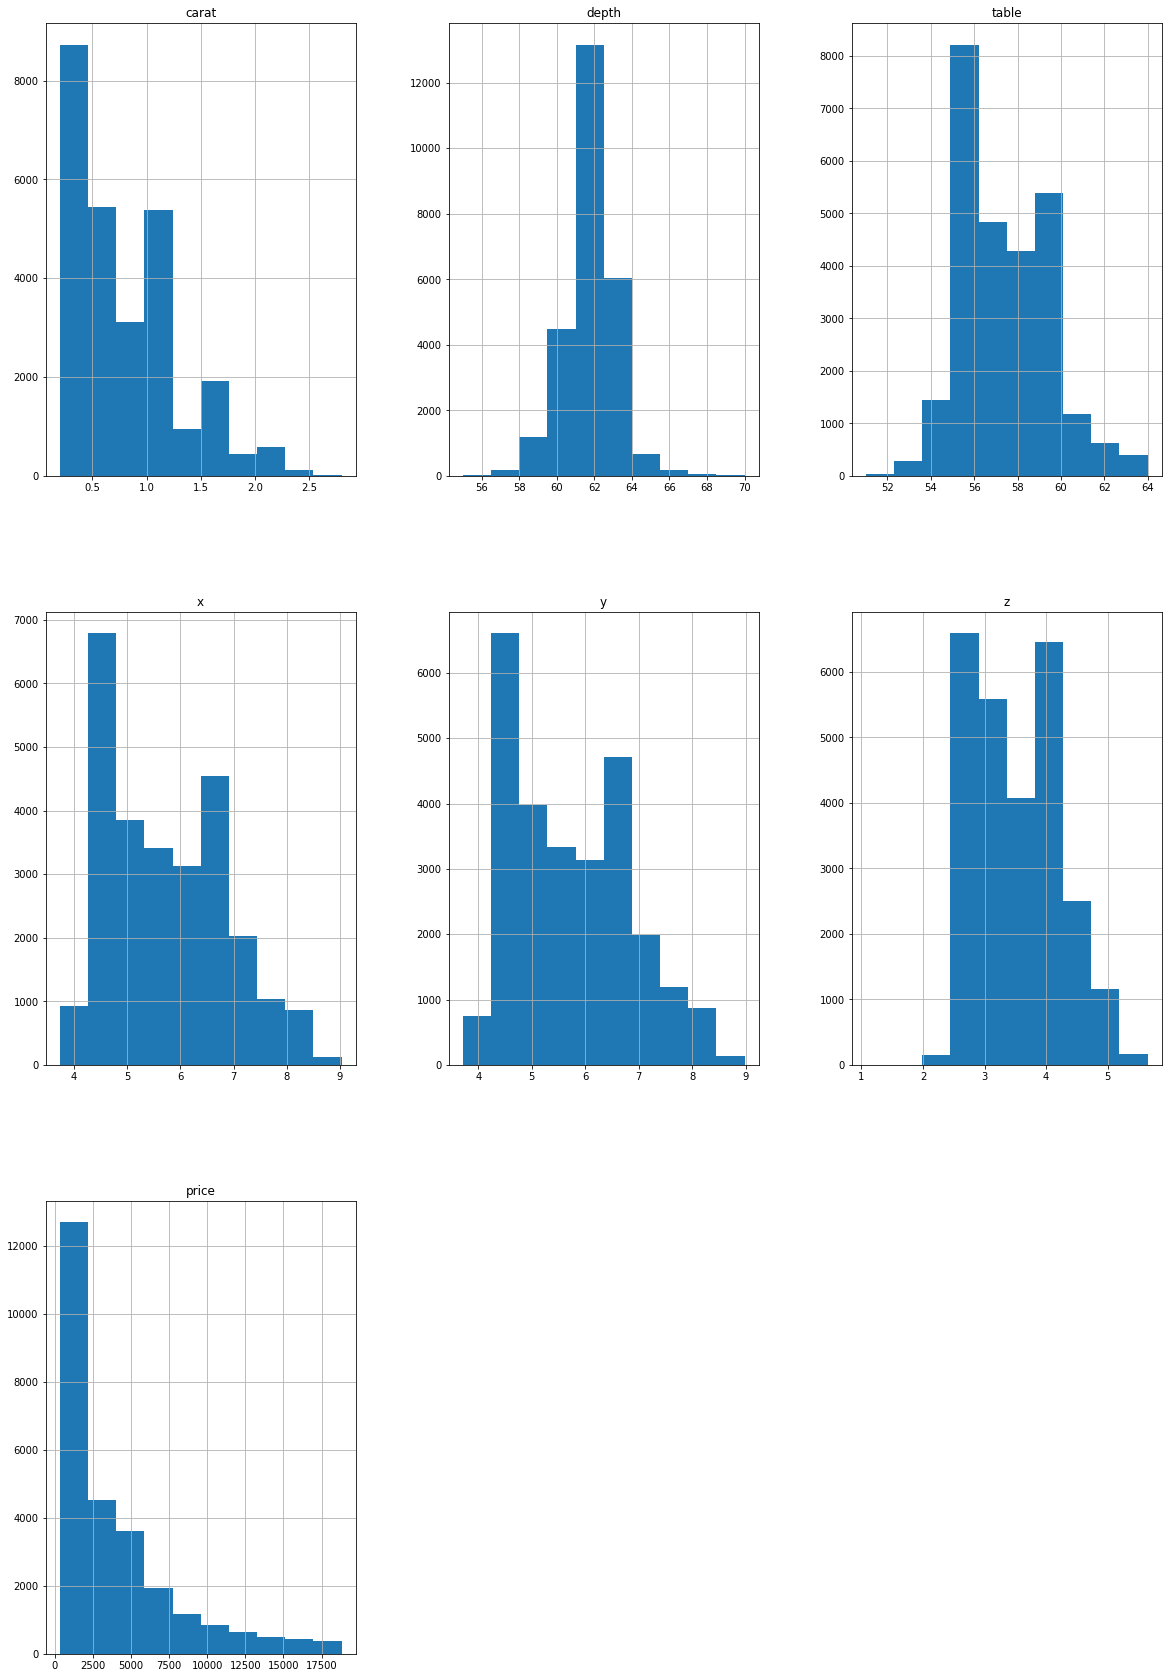

In [20]:
# histogram
df.hist(figsize=(20,30))
# Note that missing values of depth column are ignored by boxplot. So, missing values are not an issue here.

In [21]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    1.041266
depth   -0.012275
table    0.442074
x        0.389346
y        0.385166
z        0.384602
price    1.620975
dtype: float64

**Observation 5: There is certain skewness in numerical data (floats and integers) especially in price and carat columns.**

In [26]:
# converting object datatype columns to categorical datatype columns
df['cut'] = pd.Categorical(df.cut)
df['color'] = pd.Categorical(df.color)
df['clarity'] = pd.Categorical(df.clarity)

In [27]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
price         int64
dtype: object

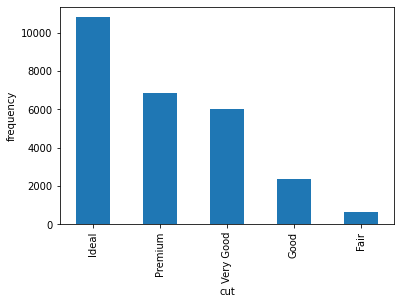

In [50]:
df['cut'].value_counts().plot(kind='bar', xlabel='cut', ylabel='frequency')

**Observation 6: As quality of cut is increasing, more records are being generated.**

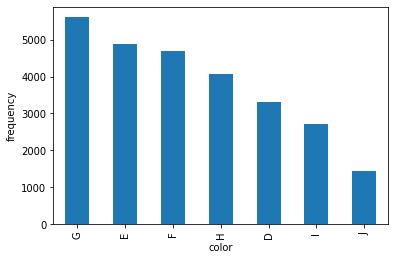

In [59]:
df['color'].value_counts().plot(kind='bar', xlabel='color', ylabel='frequency')

**Obervation 7: Most colors belong to medium color range.**

In [62]:
df['clarity'].value_counts()

SI1     6523
VS2     6049
SI2     4497
VS1     4053
VVS2    2517
VVS1    1833
IF       891
I1       339
Name: clarity, dtype: int64

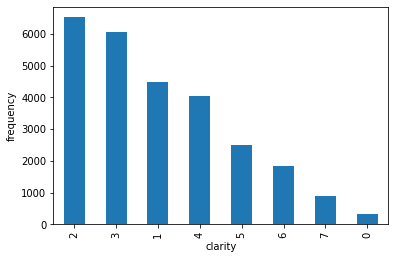

In [60]:
df2 = pd.DataFrame()
df2['clarity'] = df['clarity']
df2['clarity']=np.where(df2['clarity'] =='IF', '7', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='VVS1', '6', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='VVS2', '5', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='VS1', '4', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='VS2', '3', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='SI1', '2', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='SI2', '1', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='I1', '0', df2['clarity'])
df2['clarity'].value_counts().plot(kind='bar', xlabel='clarity', ylabel='frequency')

# Note: The clarity column values are replaced with numbers to better show frequency distribution of clarity.
# Higher number represents higher clarity.

**Observation 8: There are no FL, I2 and I3 clarity diamonds. Most frequent clarities are SI1 and VS2.**

# **Multivariate analysis**

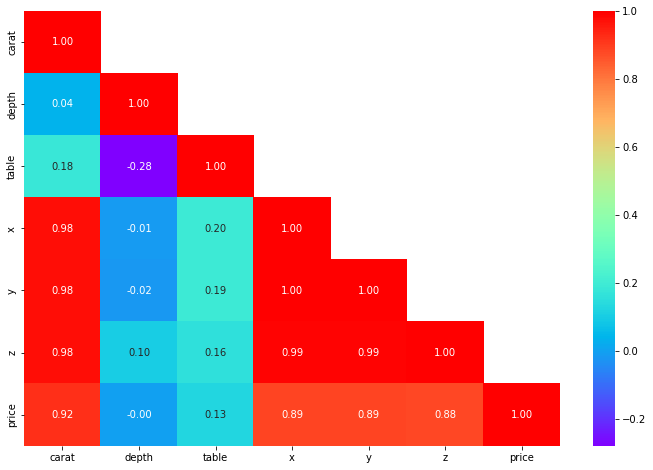

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

In [68]:
correlations = df.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.924371
y        0.888988
x        0.887535
z        0.882515
table    0.129958
depth   -0.002221
Name: price, dtype: float64

**Observation 9:**

1.   **Depth column has negligible correlation with price. Table column also has little correlation with price. Thus, these two columns do not have good linear relation with price.**
2.   **Only four indicators have good linear correlation with price. These are carat, x, y and z.**
3.   **x and y have correlation of 1. So, one of these can be dropped in analysing linear relations with price.**
4.   **Similarly, both x and y have strong correlation with z. So, only one of x, y or z is required to analyse linear relations with price.**
5.   **Carat has high correlation with x, y and z. Thus, only one of carat, x, y, or z is sufficient to study linear relations with price.**





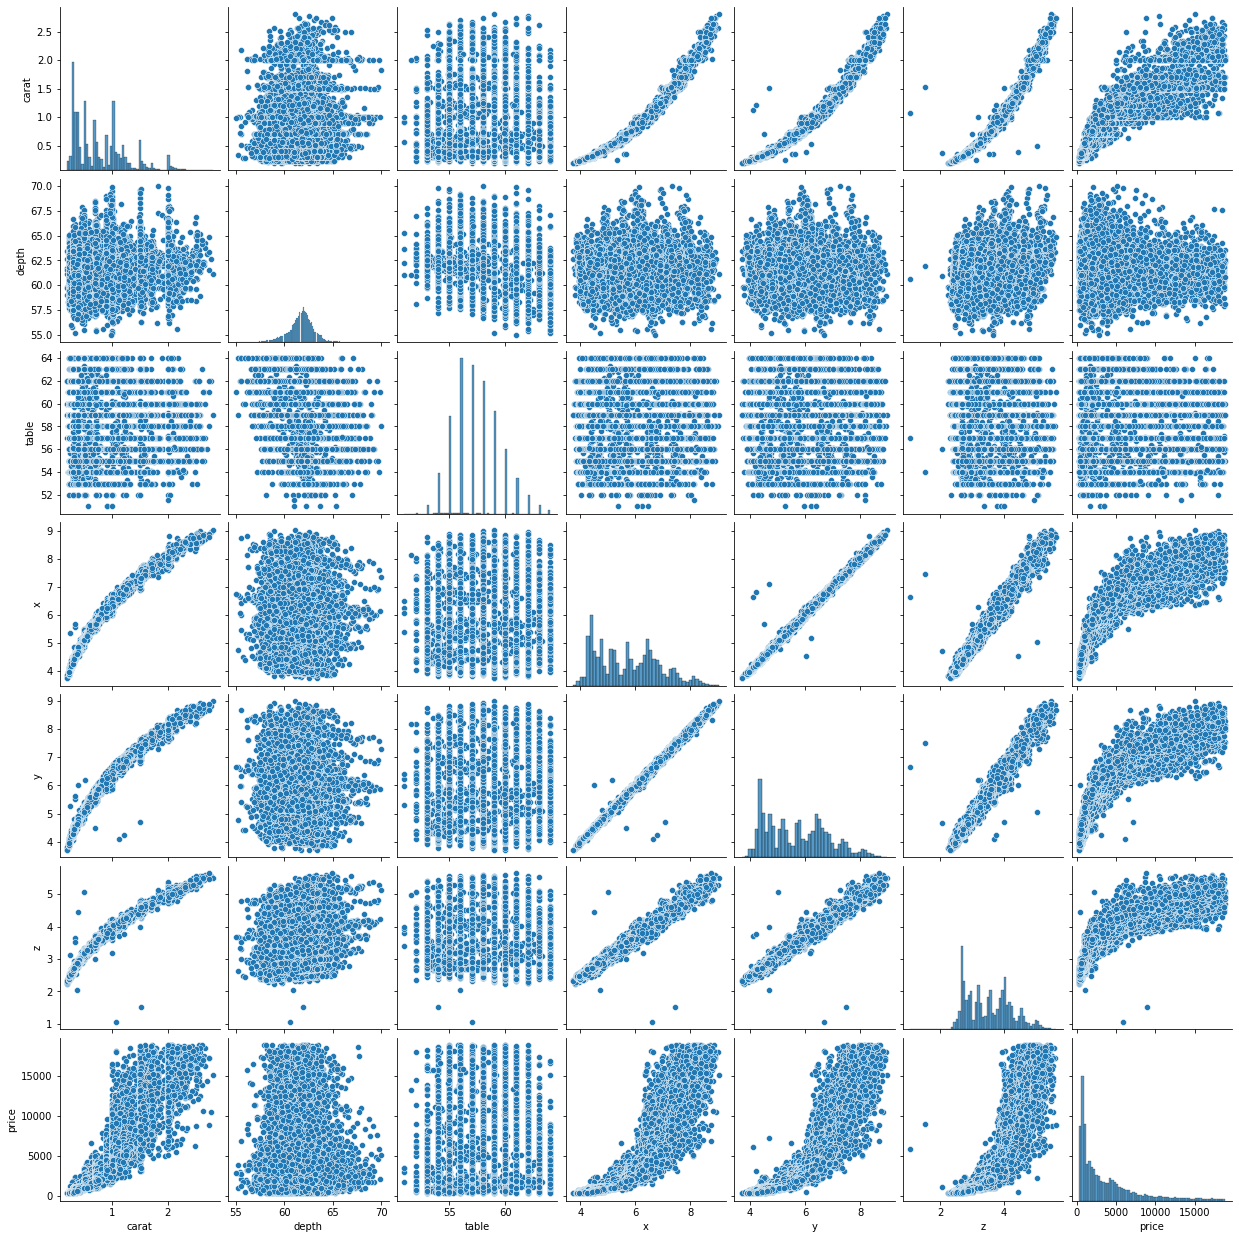

In [69]:
sns.pairplot(df)

**Observation 10:**

1.   **From pair plot, we can observe that even with strong correlation, no linear line would be properly able to explain relation between price and carot, x, y or z due to large deviations from a single line.**
2.   **This can be due to reasons like existence of non linearity and non presence of other factors that affect diamond prices like economy, location, marketing, sociocultural factors, data insufficiency and skewness etc.**

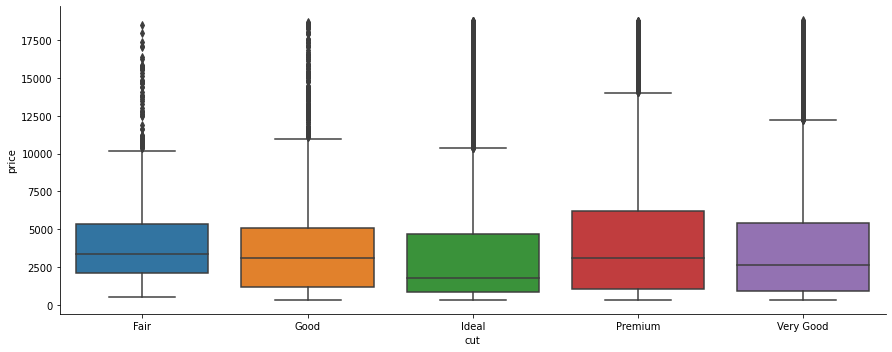

In [71]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)

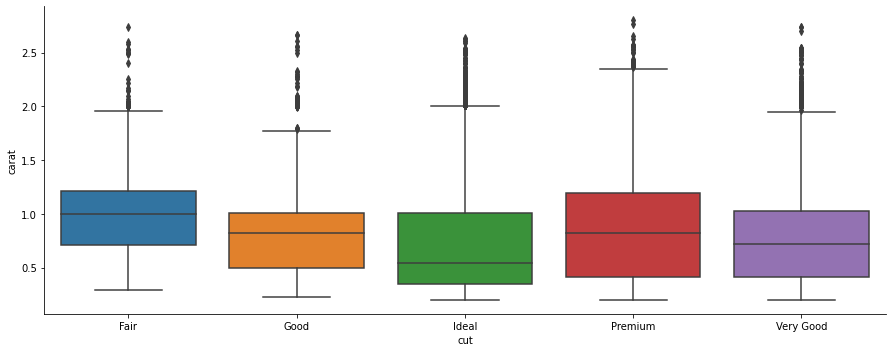

In [74]:
sns.catplot(x='cut', y='carat', kind='box', data=df, aspect=2.5)

**Observation 11:**

**Ideal cuts are having lowest prices in general even though they are of highest quality cut. Fair and good cuts are also having higher median prices than very good cut. Fair cut is having higher median price than all other cuts even though it is lowest quality cut. All of these are ironic.**
**Some reasons for this can be explained as follows:**
1.   **Catplot between cut and carat shows that the lower quality cuts are using higher median carats which explains higher median prices of lower cuts.**
2.   **Existence of huge number of outliers which do not follow the trend of median.**

**Overall, the price trend of cuts tends to follow the carat size used. However, the upper limits, 75th percentile and outliers (of catplot between price and cut) seem to show some importance of cuts.**





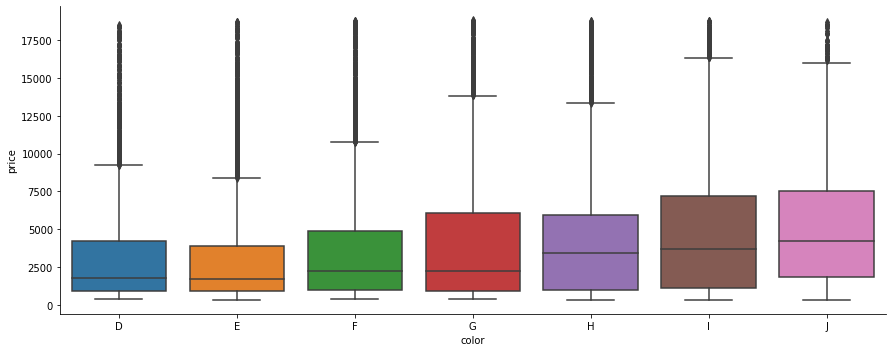

In [72]:
sns.catplot(x='color', y='price', data=df, aspect =2.5, kind='box')

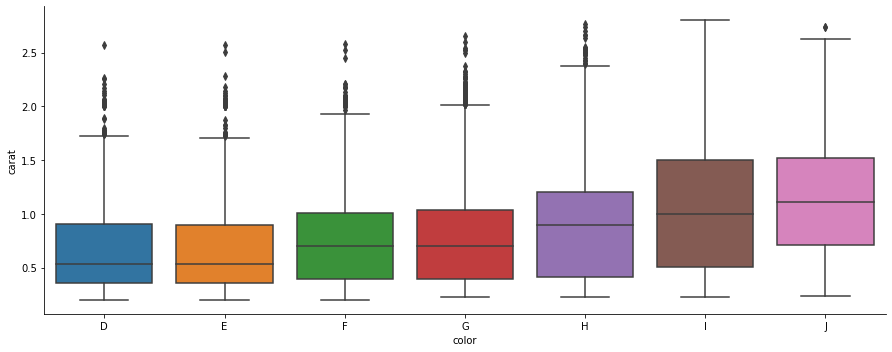

In [75]:
sns.catplot(x='color', y='carat', data=df, aspect =2.5, kind='box')

**Observation 12:**

1.   **Lower quality colors are having prices than higher quality colors which is ironic.**
2.   **However, catplot of color vs carat clarifies this. Lower quality colors are being combined with higher carats in general which is reason for higher prices.**
3.   **The both catplots (color vs price and color vs carat) seem to follow same trend in general. This shows significant influence of carat size and low importance of color.**




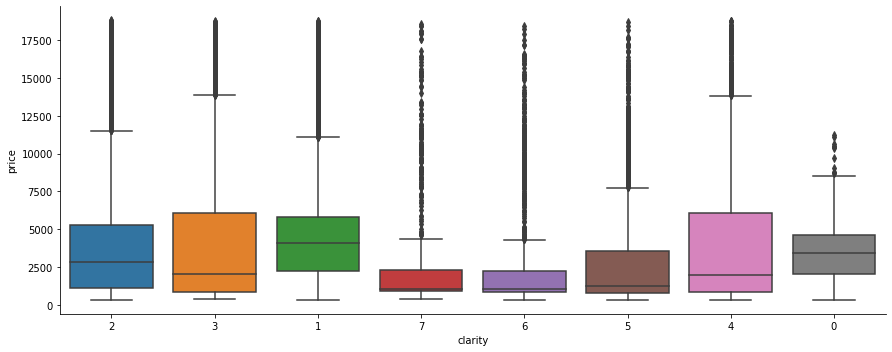

In [78]:
df2['price'] = df['price']
sns.catplot(x='clarity', y='price', data=df2, aspect =2.5, kind='box')

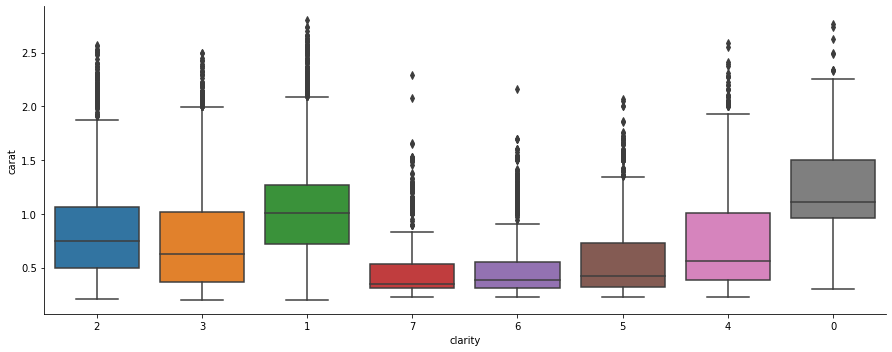

In [80]:
df2['carat'] = df['carat']
sns.catplot(x='clarity', y='carat', data=df2, aspect =2.5, kind='box')

**Observation 13:**

1.   **Lower clarity diamonds are more expensive than higher clarity diamonds in general. This is ironic.**
2.   **Box plot between clarity and carat solves this issue. Lower clarity diamonds are having high carat in general which explains the high price.**
3.   **The both catplots (clarity vs price and clarity vs carat) seem to follow same trend in general. This shows significant influence of carat size and low importance of clarity.**



**Observation 14:**

1.   **From correlations to cat plots, carat size seems to have very large influence on diamond price. However, the relation is not just plainly linear as seen in pair plot between carat and price. This shows that other factors affect diamond price as well or there exists some non linearity.**
2.   **More factors that affect diamond price need to be explored to better understand diamond prices. These factors may not be the factors listed in this dataset. This is because x, y and z have very high correlation with carat making them unimportant. Similarly, depth and table seem to have negligible influence on diamond price as seen in correlations. Color and clarity seem to have less influence based on catplots. Cut seems to have some influence even though small. Thus, other factors can be explored or better functional relations between carat and price can be explored which could pave way for better understanding and predictions.**

